In [6]:
%tensorflow_version 2.x  
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [7]:
#read in data
df = pd.read_csv('country_vaccinations.csv')

In [8]:
#look at the data
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/


In [9]:
#more in depth visualization
df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,1.079500e+04,1.003800e+04,7.667000e+03,8.998000e+03,1.855100e+04,10795.000000,10038.000000,7667.000000,18551.000000
mean,6.102324e+06,3.662965e+06,1.932332e+06,1.511979e+05,8.117918e+04,18.099780,12.903832,6.801034,3090.294432
std,2.597877e+07,1.370318e+07,8.338994e+06,6.630219e+05,4.217551e+05,25.533342,16.506587,10.968261,4741.004220
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,6.813200e+04,5.868525e+04,2.660050e+04,3.262000e+03,8.260000e+02,1.610000,1.480000,0.745000,347.000000
50%,4.951160e+05,3.855970e+05,2.051550e+05,1.721200e+04,5.971000e+03,7.690000,5.980000,2.840000,1524.000000
75%,2.294724e+06,1.588512e+06,8.110915e+05,6.714150e+04,3.043600e+04,24.155000,17.967500,7.965000,4204.000000
max,4.356890e+08,1.583654e+08,1.244557e+08,1.505300e+07,1.328457e+07,223.150000,115.530000,107.620000,118759.000000


In [10]:
#check out df information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18764 entries, 0 to 18763
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              18764 non-null  object 
 1   iso_code                             18764 non-null  object 
 2   date                                 18764 non-null  object 
 3   total_vaccinations                   10795 non-null  float64
 4   people_vaccinated                    10038 non-null  float64
 5   people_fully_vaccinated              7667 non-null   float64
 6   daily_vaccinations_raw               8998 non-null   float64
 7   daily_vaccinations                   18551 non-null  float64
 8   total_vaccinations_per_hundred       10795 non-null  float64
 9   people_vaccinated_per_hundred        10038 non-null  float64
 10  people_fully_vaccinated_per_hundred  7667 non-null   float64
 11  daily_vaccinations_per_milli

In [11]:
#convert to date-time
df["date"] = pd.to_datetime(df.date)

In [12]:
#group people_vaccinated according to country
df["people_vaccinated"]= df.groupby("country").total_vaccinations.tail(1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


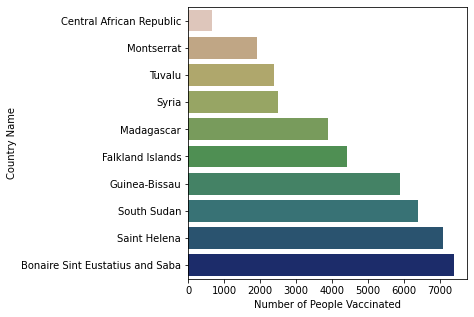

In [13]:
#visualizing countries with the least number of people vaccinated
x = df.groupby("country")["people_vaccinated"].mean().sort_values(ascending= True).head(10)
plt.figure(figsize= (5,5))
ax= sns.barplot(x.values,x.index, palette="gist_earth_r")
ax.set_xlabel("Number of People Vaccinated")
ax.set_ylabel("Country Name")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


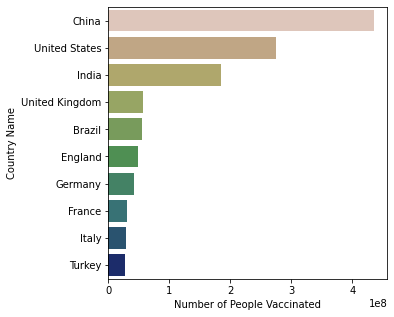

In [14]:
#visualizing countries with the most number of people vaccinated
x = df.groupby("country")["people_vaccinated"].mean().sort_values(ascending= False).head(10)
plt.figure(figsize= (5,5))
ax= sns.barplot(x.values,x.index, palette="gist_earth_r")
ax.set_xlabel("Number of People Vaccinated")
ax.set_ylabel("Country Name")
plt.show()

In [15]:
df_India = df.loc[(df.country == 'India')]
df_India.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
7646,India,IND,2021-01-15,0.0,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Covaxin, Oxford/AstraZeneca",Government of India,https://dashboard.cowin.gov.in/
7647,India,IND,2021-01-16,191181.0,NaN,NaN,191181.0,191181.0,0.01,0.01,NaN,139.0,"Covaxin, Oxford/AstraZeneca",Government of India,https://dashboard.cowin.gov.in/
7648,India,IND,2021-01-17,224301.0,NaN,NaN,33120.0,112150.0,0.02,0.02,NaN,81.0,"Covaxin, Oxford/AstraZeneca",Government of India,https://dashboard.cowin.gov.in/
7649,India,IND,2021-01-18,454049.0,NaN,NaN,229748.0,151350.0,0.03,0.03,NaN,110.0,"Covaxin, Oxford/AstraZeneca",Government of India,https://dashboard.cowin.gov.in/
7650,India,IND,2021-01-19,674835.0,NaN,NaN,220786.0,168709.0,0.05,0.05,NaN,122.0,"Covaxin, Oxford/AstraZeneca",Government of India,https://dashboard.cowin.gov.in/


(array([737805., 737822., 737836., 737850., 737864., 737881., 737895.,
        737911., 737925.]), <a list of 9 Text major ticklabel objects>)

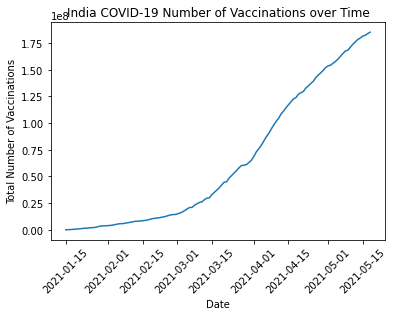

In [16]:
myplot = sns.lineplot(data=df_India, x="date", y="total_vaccinations")
plt.xlabel("Date")
plt.ylabel("Total Number of Vaccinations")
plt.title("India COVID-19 Number of Vaccinations over Time")
plt.xticks(rotation=45)

In [17]:
df_USA = df.loc[(df.country == 'United States')]
df_USA.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
18045,United States,USA,2020-12-20,556208.0,NaN,NaN,NaN,NaN,0.17,0.17,NaN,NaN,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
18046,United States,USA,2020-12-21,614117.0,NaN,NaN,57909.0,57909.0,0.18,0.18,NaN,173.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
18047,United States,USA,2020-12-22,NaN,NaN,NaN,NaN,127432.0,NaN,NaN,NaN,381.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
18048,United States,USA,2020-12-23,1008025.0,NaN,NaN,NaN,150606.0,0.30,0.30,NaN,450.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
18049,United States,USA,2020-12-24,NaN,NaN,NaN,NaN,191001.0,NaN,NaN,NaN,571.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...


(array([737791., 737822., 737850., 737881., 737911.]),
 <a list of 5 Text major ticklabel objects>)

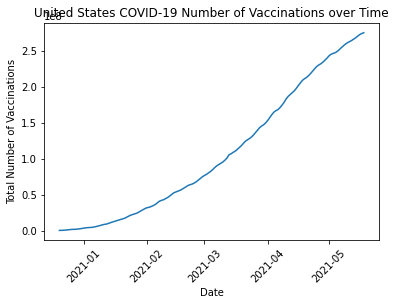

In [18]:
myplot = sns.lineplot(data=df_USA, x="date", y="total_vaccinations",)
plt.xlabel("Date")
plt.ylabel("Total Number of Vaccinations")
plt.title("United States COVID-19 Number of Vaccinations over Time")
plt.xticks(rotation=45)

In [25]:
countryComparison = df.loc[(df.country == 'United States') | (df.country == 'India') | (df.country == 'England') | (df.country == 'Germany')]
countryComparison.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
4997,England,OWID_ENG,2021-01-03,1193335.0,NaN,20660.0,NaN,NaN,2.12,2.08,0.04,NaN,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
4998,England,OWID_ENG,2021-01-04,NaN,NaN,NaN,NaN,162918.0,NaN,NaN,NaN,2894.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
4999,England,OWID_ENG,2021-01-05,NaN,NaN,NaN,NaN,162918.0,NaN,NaN,NaN,2894.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
5000,England,OWID_ENG,2021-01-06,NaN,NaN,NaN,NaN,162918.0,NaN,NaN,NaN,2894.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
5001,England,OWID_ENG,2021-01-07,NaN,NaN,NaN,NaN,162918.0,NaN,NaN,NaN,2894.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


(array([737791., 737822., 737850., 737881., 737911.]),
 <a list of 5 Text major ticklabel objects>)

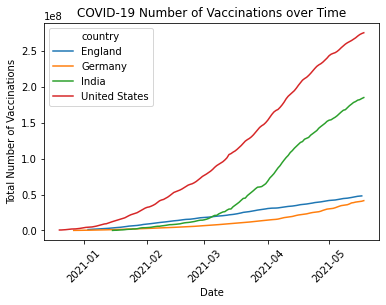

In [26]:
myplot = sns.lineplot(data=countryComparison, x="date", y="total_vaccinations",hue ='country')
plt.xlabel("Date")
plt.ylabel("Total Number of Vaccinations")
plt.title("COVID-19 Number of Vaccinations over Time")
plt.xticks(rotation=45)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


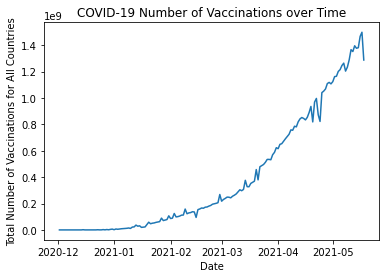

In [28]:
#examine the total vaccines over time
x = df.groupby("date").total_vaccinations.sum()
sns.lineplot(x.index, x.values)
plt.xlabel("Date")
plt.ylabel("Total Number of Vaccinations for All Countries")
plt.title("COVID-19 Number of Vaccinations over Time")
plt.show()

In [47]:
#choropleth visualization
import plotly.express as px
fig = px.choropleth(df, locations = 'iso_code', color = 'people_fully_vaccinated', hover_name = 'country',
                    color_continuous_scale = 'agsunset')
fig.show()